In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
from matplotlib import pyplot as plt

Mounted at /content/drive


#**Loading and Cleaning Data**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Copy of heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df = df.drop(columns= ["MentalHealth","PhysicalHealth"])

In [4]:
from sklearn.preprocessing import LabelEncoder
# Doing internal factors (age, sex, race)

HeartDisease_le = LabelEncoder()
Smoking_le = LabelEncoder()
AlcoholDrinking_le = LabelEncoder()
Stroke_le = LabelEncoder()
DiffWalking_le = LabelEncoder()
Sex_le = LabelEncoder()
# AgeCategory_le = LabelEncoder()
# Race_le = LabelEncoder()
Diabetic_le = LabelEncoder()
PhysicalActivity_le = LabelEncoder()
# GenHealth_le = LabelEncoder()
Asthma_le = LabelEncoder()
KidneyDisease_le = LabelEncoder()
SkinCancer_le = LabelEncoder()


df['HeartDisease'] = HeartDisease_le.fit_transform(df['HeartDisease'])
df['Smoking'] = Smoking_le.fit_transform(df['Smoking'])
df['AlcoholDrinking'] = AlcoholDrinking_le.fit_transform(df['AlcoholDrinking'])
df['Stroke'] = Stroke_le.fit_transform(df['Stroke'])
df['DiffWalking'] = DiffWalking_le.fit_transform(df['DiffWalking'])
df['Sex'] = Sex_le.fit_transform(df['Sex'])
# df['AgeCategory'] = AgeCategory_le.fit_transform(df['AgeCategory'])
# df['Race'] = Race_le.fit_transform(df['Race'])
df['Diabetic'] = Diabetic_le.fit_transform(df['Diabetic'])
df['PhysicalActivity'] = PhysicalActivity_le.fit_transform(df['PhysicalActivity'])
# df['GenHealth'] = GenHealth_le.fit_transform(df['GenHealth'])
df['Asthma'] = Asthma_le.fit_transform(df['Asthma'])
df['KidneyDisease'] = KidneyDisease_le.fit_transform(df['KidneyDisease'])
df['SkinCancer'] = SkinCancer_le.fit_transform(df['SkinCancer'])


df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex')], axis=1)
df = pd.concat([df, pd.get_dummies(df['AgeCategory'], prefix='AgeCategory')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Race'], prefix='Race')], axis=1)
df = pd.concat([df, pd.get_dummies(df['GenHealth'], prefix='GenHealth')], axis=1)

df = df.drop(columns=['AgeCategory', 'Race', 'GenHealth', 'Sex'])

df.rename(columns = {'AgeCategory_18-24':'18-24', 'AgeCategory_25-29':'25-29',
                            'AgeCategory_30-34': '30-34', 'AgeCategory_35-39':'35-39', 'AgeCategory_40-44':'40-44',
       'AgeCategory_45-49':'45-49', 'AgeCategory_50-54':'50-54', 'AgeCategory_55-59':'55-59',
       'AgeCategory_60-64':'60-64', 'AgeCategory_65-69':'65-69', 'AgeCategory_70-74':'70-74',
       'AgeCategory_75-79':"75-79", 'AgeCategory_80 or older': '80+', 'Sex_0' : "IsFemale", 'Sex_1' : "IsMale",}, inplace = True)


In [5]:
cleanedDf = df.drop(columns= ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Diabetic', 'PhysicalActivity', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good'])






ageGroups = ['18-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

raceGroups = ['Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White']

#**Balancing the Data and Train Test Split**

In [6]:
from sklearn.model_selection import train_test_split

heartDisease_df = df[df['HeartDisease'] == 1]
train_heartDisease, test_heartDisease = train_test_split(heartDisease_df, train_size=0.7)
num_heartDisease = len(train_heartDisease)
no_heartDisease_df = df[df['HeartDisease'] == 0]


heartDisease_df
agePercents = []
agePercentsMale = []
agePercentsFemale = []


maledf = cleanedDf.loc[cleanedDf['IsMale'] == 1]
femaledf = cleanedDf.loc[cleanedDf['IsFemale'] == 1]

heartDiseasemale = maledf.loc[maledf['HeartDisease'] == 1]
heartDiseasefemale = femaledf.loc[femaledf['HeartDisease'] == 1]

# Male Groups
for i in ageGroups:
  # print(i + " percent is: " +  str(heartDisease_df[i].sum()/cleanedDf[i].sum()))
  agePercentsMale.append(heartDiseasemale[i].sum()/cleanedDf[i].sum())
  agePercentsFemale.append(heartDiseasefemale[i].sum()/cleanedDf[i].sum())
  agePercents.append(heartDisease_df[i].sum()/cleanedDf[i].sum())




# print(agePercentsMale)
# print(agePercentsFemale)

newdf = pd.DataFrame({'Age groups':ageGroups, 'Heart disease percent Male':agePercentsMale, 'Heart disease percent Female':agePercentsFemale, 'Heart disease percent All':agePercents})



#**Graph Building**

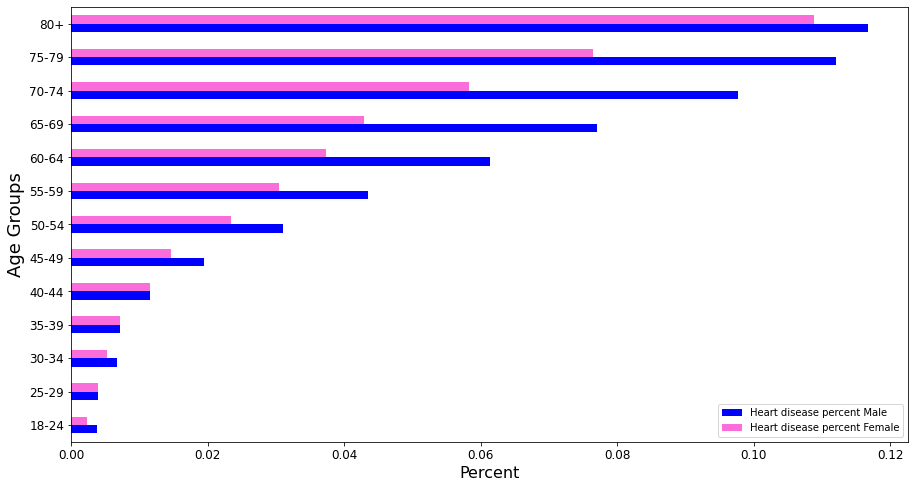

In [7]:
ax = newdf.plot.barh(x='Age groups', y=['Heart disease percent Male', 'Heart disease percent Female'], figsize=(15,8), color=['Blue', '#fa6edb'])
plt.ylabel('Age Groups', fontsize=18)
plt.xlabel('Percent', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

,Race groups,Heart disease percent
0,Race_American Indian/Alaskan Native,0.104191
1,Race_Asian,0.032970
2,Race_Black,0.075374
3,Race_Hispanic,0.052576
4,Race_Other,0.081076
5,Race_White,0.091786


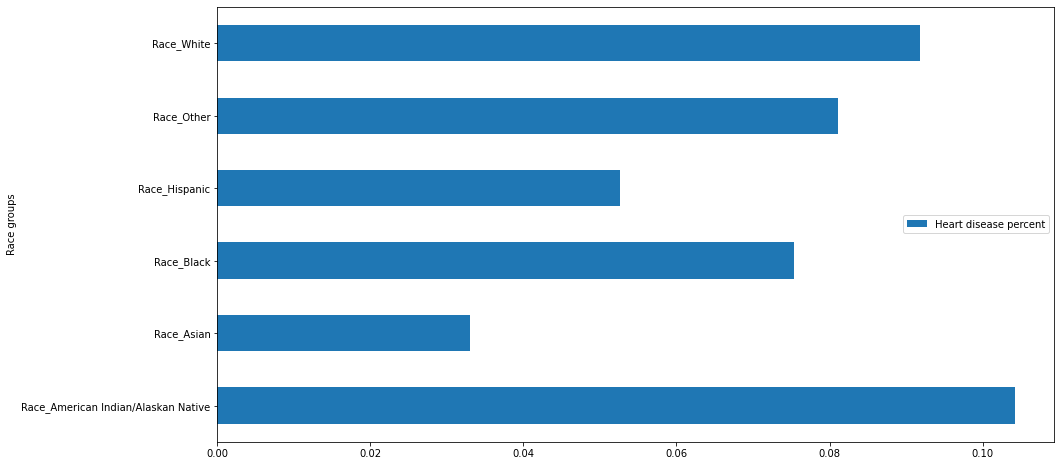

In [8]:
racePercents = []


for i in raceGroups:
  # print(i + " percent is: " +  str(heartDisease_df[i].sum()/cleanedDf[i].sum()))
  racePercents.append(heartDisease_df[i].sum()/cleanedDf[i].sum())

newdf = pd.DataFrame({'Race groups':raceGroups, 'Heart disease percent':racePercents})



ax = newdf.plot.barh(x='Race groups', y='Heart disease percent', figsize=(15,8))
newdf

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

train_noHeartDisease, test_noHeartDisease = train_test_split(no_heartDisease_df, train_size=num_heartDisease)
train_df = pd.concat([train_heartDisease, train_noHeartDisease])
test_df = pd.concat([test_heartDisease, test_noHeartDisease])


In [11]:
X_train = train_df[['18-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80+']]
X_test = test_df[['18-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80+']]




X_train2 = train_df[['Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White']]
X_test2 = test_df[['Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White']]
                    
y_train = train_df['HeartDisease']
y_test = test_df['HeartDisease']

#**Building Predictive Models (Logistic Regression)**
Here I made some Logistic Regression Models to see and test to find high accuracy. Much of this is just me familiarizing myself with the data by testing out models using different columns. The graphs used in the presentation are in the other ipynb file.

In [13]:
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train, y_train)

logr_preds = logr.predict(X_test)
logr_proba_preds = logr.predict_proba(X_test)[:,1]

In [14]:
confusion_matrix(y_test, logr_preds, normalize='true')


array([[0.58048166, 0.41951834],
       [0.20457867, 0.79542133]])

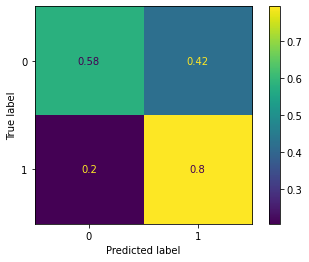

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, logr_preds, normalize='true')
plt.show()

''

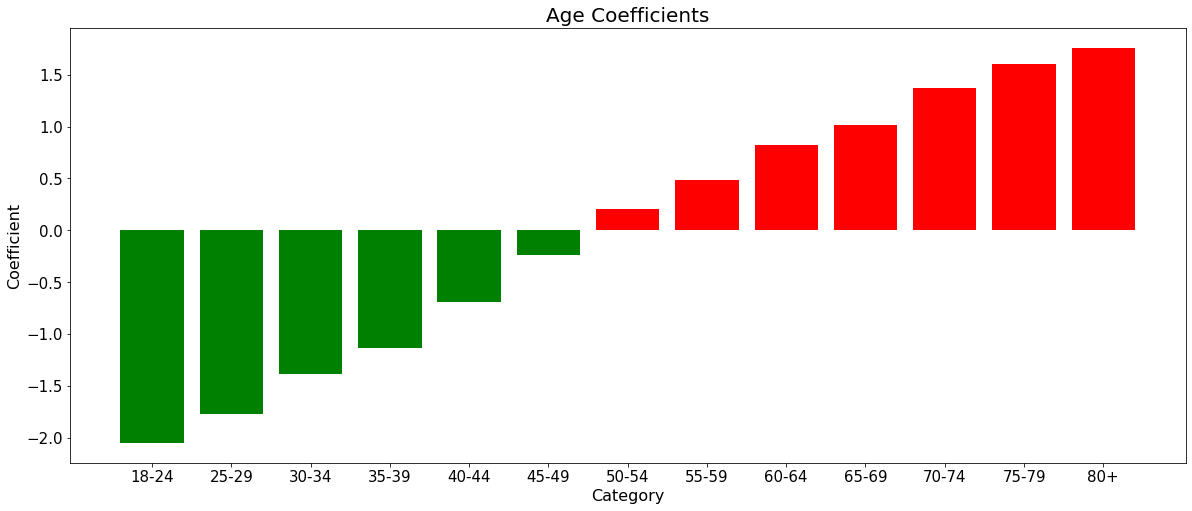

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.bar(x=X_train.columns, height=logr.coef_[0], color = ['g', 'g','g', 'g','g', 'g','r','r','r','r','r','r','r']) # The zero is needed because the coefficients are an array of arrays.
plt.xticks(rotation = 90) # Rotate the labels so you can read them

plt.title('Age Coefficients', fontsize=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Coefficient', fontsize=16)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)
;

In [18]:
logr2 = LogisticRegression(max_iter=10000)
logr2.fit(X_train2, y_train)

logr_preds2 = logr2.predict(X_test2)
logr_proba_preds2 = logr2.predict_proba(X_test2)[:,1]

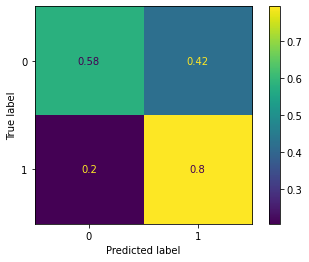

In [19]:
confusion_matrix(y_test, logr_preds, normalize='true')
ConfusionMatrixDisplay.from_predictions(y_test, logr_preds, normalize='true')
plt.show()

''

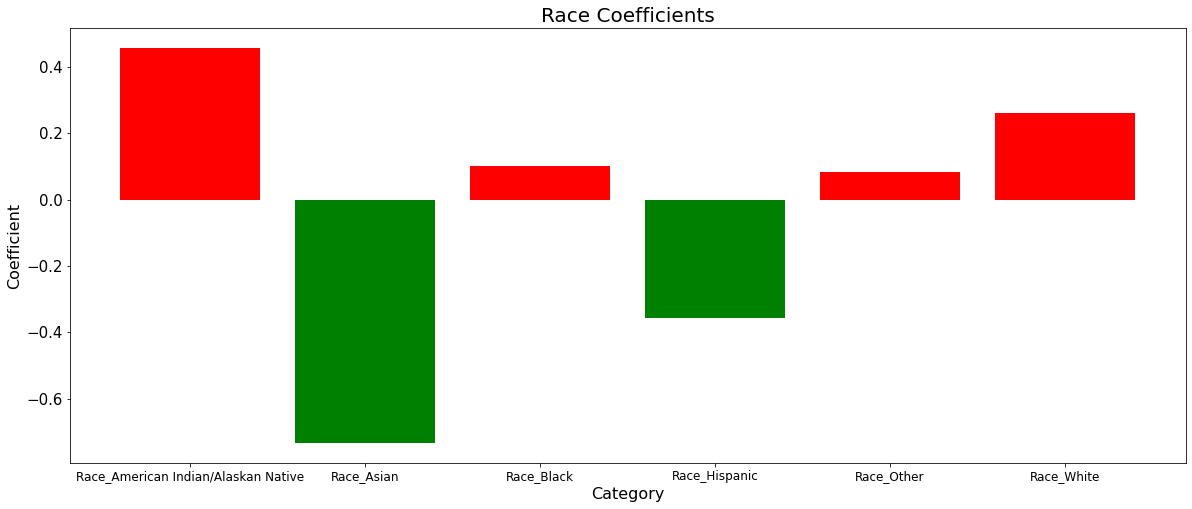

In [20]:
plt.figure(figsize=(20, 8))
plt.bar(x=X_train2.columns, height=logr2.coef_[0], color = ['r','g','r','g','r','r']) # The zero is needed because the coefficients are an array of arrays.
plt.xticks(rotation = 90) # Rotate the labels so you can read them

plt.title('Race Coefficients', fontsize=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Coefficient', fontsize=16)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=15)
;

In [21]:
X_train3 = train_df[['Smoking', 'Stroke',
       'DiffWalking', 'IsFemale', 'IsMale',
       'KidneyDisease', 'SkinCancer', '18-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80+', 'Race_Asian', 'Race_American Indian/Alaskan Native',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good', 
       'GenHealth_Poor', 'GenHealth_Very good']]

X_test3 = test_df[['Smoking', 'Stroke',
       'DiffWalking', 'IsFemale', 'IsMale',
      'KidneyDisease', 'SkinCancer', '18-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80+', 'Race_Asian','Race_American Indian/Alaskan Native',
       
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good', 
       'GenHealth_Poor', 'GenHealth_Very good']]

In [22]:
logr3 = LogisticRegression(max_iter=10000)
logr3.fit(X_train3, y_train)

logr_preds3 = logr3.predict(X_test3)
logr_proba_preds3 = logr3.predict_proba(X_test3)[:,1]

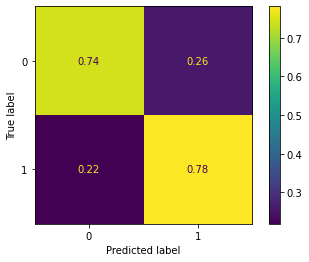

In [23]:
confusion_matrix(y_test, logr_preds3, normalize='true')
ConfusionMatrixDisplay.from_predictions(y_test, logr_preds3, normalize='true')
plt.show()

In [24]:
X_train4 = train_df[['IsFemale', 'IsMale', '18-24', '25-29',
       '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80+', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White']]

X_test4 = test_df[['IsFemale', 'IsMale', '18-24', '25-29',
       '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80+', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White']]

In [25]:
logr4 = LogisticRegression(max_iter=10000)
logr4.fit(X_train4, y_train)

logr_preds4 = logr4.predict(X_test4)
logr_proba_preds4 = logr4.predict_proba(X_test4)[:,1]

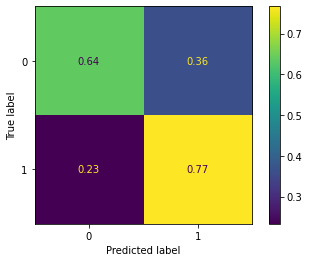

In [26]:
confusion_matrix(y_test, logr_preds4, normalize='true')
ConfusionMatrixDisplay.from_predictions(y_test, logr_preds4, normalize='true')
plt.show()

''

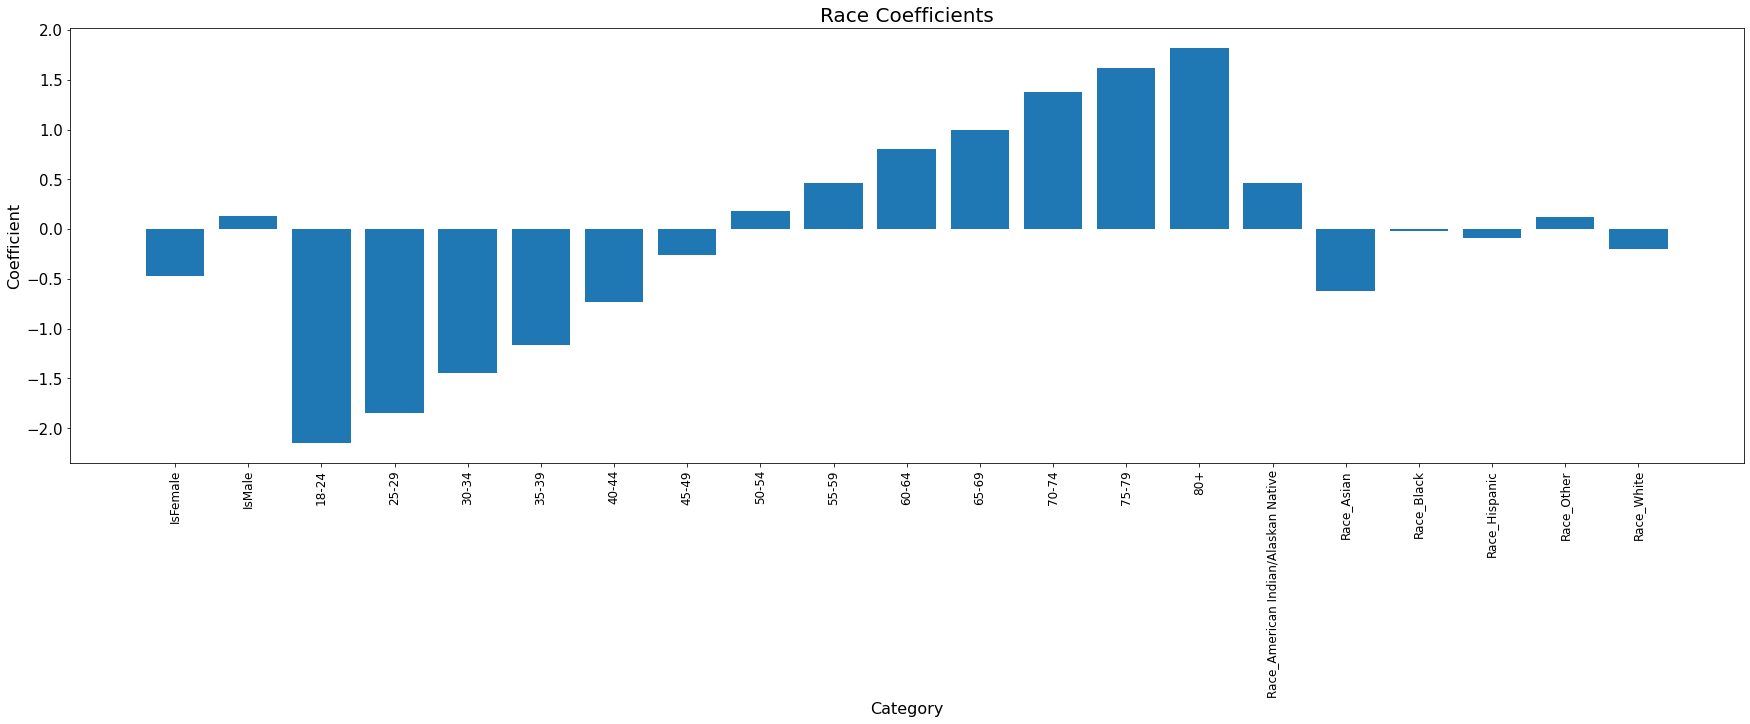

In [27]:
plt.figure(figsize=(30, 8))
plt.bar(x=X_train4.columns, height=logr4.coef_[0]) # The zero is needed because the coefficients are an array of arrays.
plt.xticks(rotation = 90) # Rotate the labels so you can read them

plt.title('Race Coefficients', fontsize=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Coefficient', fontsize=16)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=15)
;